In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import gzip
import os
import time
import re
from curses.ascii import isdigit
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "Helvetica"
})

In [ ]:

def plot_bar(x,y,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800):
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    
    leftaxis.bar(x, y, color='#4eb3d3', label='Throughput',width=bar_width,zorder=2)
    # bar的zorder取2
    for i, val in enumerate(y):
        leftaxis.text(x[i], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    # grid的zorder取0
    x_major_locator=MultipleLocator(bar_width*2)
    leftaxis.xaxis.set_major_locator(x_major_locator)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()
    
def readfile(src="source/graph.txt"):
    input = list()
    with open(src, "r") as f:
        readin=f.read().split("\n\n")
        temp_array = np.array([])
        for string in readin:
            if string[0].isdigit():
                blocks = string.split("\n")
                for block_ in blocks:
                    rowarray = np.fromstring(block_,dtype=float,sep=' ')
                    input.append(rowarray)
    for i,s in enumerate(input):
        input[i] = np.around(s,2)
    return input
    
np.set_printoptions(suppress=True)

def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50']):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val-3*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    print(x)
    leftaxis.legend(loc=0)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()


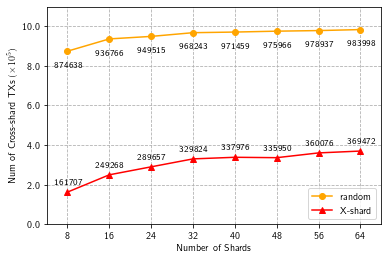

In [22]:
def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val-3*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+str(pic_name)+".png", dpi=600, bbox_inches='tight')
    plt.show()

data = np.genfromtxt('cr-tx.csv', delimiter=',')

data = np.delete(data,0,axis=0)

data = np.transpose(data)

data = data.astype(int)

x = data[0,:]

plot_beta(data=data,bar_width=(x[1]-x[0])/2,pic_name=11,save=True,xlabel="Number of Shards", ylabel=r'Num of Cross-shard TXs $(\times 10^5)$',text_location=30000,xlim=1000000,ylim=1100000,labellist=['random','X-shard','cross-shard tx'],ytick_k=True)

In [4]:
np.linspace(0,1000000,5)

array([      0.,  250000.,  500000.,  750000., 1000000.])

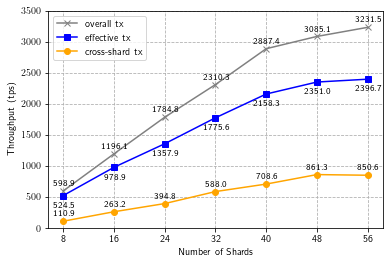

In [8]:
data = np.loadtxt('source/result.txt')
data = np.transpose(data)
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
            else:
                leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='throughtput',save=True,xlabel="Number of Shards", ylabel="Throughput (tps)",text_location=50,ylim=3500,labellist=['overall tx','effective tx','cross-shard tx'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

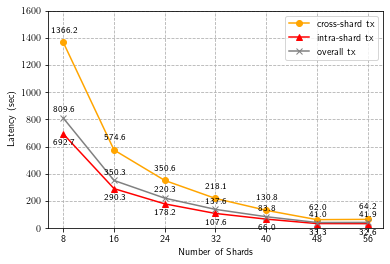

In [3]:
df = pd.read_csv('source/latency.csv')

data = np.transpose(df.to_numpy())
data = data.round(1)


def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s','v','1','v']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        for j, val in enumerate(y[i,:]):
            if i==1:
                leftaxis.text(x[j], val-3.2*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                # leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9, 'color':'red'})
            else:
                if i == 2:
                    # leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9,'color':'red'})
                    leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
                else:
                    # leftaxis.text(x[j], val+2*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9,'color':'green'})
                    leftaxis.text(x[j], val+2*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency',save=True,xlabel="Number of Shards", ylabel="Latency (sec)",text_location=30,ylim=1600,labellist=['cross-shard tx', 'intra-shard tx', 'overall tx'])